In [3]:
from hashlib import *

In [8]:
??sha256('paco'.encode('utf8')).hexdigest()

In [12]:
md5('paco'.encode('utf8')).hexdigest()

'311020666a5776c57d265ace682dc46d'

In [4]:
from pyblake2 import blake2b

In [32]:
blake2b('paco'.encode('utf8'),salt=b'Hola').hexdigest()

'5c0a0c51f3fca744defd17fb6b2a25a78f6aea0a982a3cbc17ac3e4e9aed97c46ca08f34df0691ca71b74bc59878e95bc9a3d411010bf4d438aeedae7ef7f580'

In [19]:
import string
from random import choice,randint

def hash_generator(semilla=12345,k=100):
    random.seed(semilla)
    hash_salts = []
    
    for i in range(k):
        min_char = 8
        max_char = 12
        allchar = string.ascii_letters + string.digits
        password = "".join(choice(allchar) for x in range(randint(min_char, max_char)))
        salt = password.encode()
        hash_salts.append(salt)
    
    return hash_salts

In [14]:

import random
big_prime = 526717
random.seed(12345)
sales = hash_generator(1)
words = []
for i in range(100000):
    palabra = ''.join(random.choice(string.digits) for _ in range(12))
    words.append(palabra)
unique_words = set(words)
print("palabras unicas {}".format(len(unique_words)))
hashes = []
for w in words:
p = [str(int(blake2b(w.encode(),salt=salt).hexdigest()[:10],16) % big_prime ) for salt in sales]
p = ''.join(p)
hashes.append(p)

bloom_filter = np.zeros(big_prime)
print("numhashes {} y unicos {}".format(len(hashes),len(set(hashes))))
x = [int(h) for h in hashes]
print("min num entero mapeado {} y max {}".format(min(x),max(x)))

palabras unicas 100000
numhashes 100000 y unicos 100000
min num entero mapeado 9444545 y max 1099506432342


In [ ]:
# funcion para activar el filtro
def add_mac(hashes, bloom):
    bloom_filter[hashes] = 1

In [30]:

def genera_hashes(elemento,salts,modulo_primo=526717):
    """
    Recibe un elemento, y genera los hashes blake2b del elemento, se mapean a
    enteros y se les aplica módulo de un primo dado.
    """
    elemento = elemento.encode() 
    hashes = [int(blake2b(elemento,salt=salt).hexdigest()[:10],16) % modulo_primo\
    for salt in salts] 
    
    return hashes

In [31]:
sales = hash_generator()
hashes = genera_hashes('paco',sales)

In [32]:
bloom_filter = np.zeros(526717)

In [34]:
bloom_filter[hashes] = 1

In [37]:
bloom_filter[bloom_filter==1]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [41]:
def hash_family(semilla=12345,k=100):
    """
	Dado una semilla y un número k, 
	genera los salts (semilla en string)
	para generar k funciónes de hash blake2b
	"""
    random.seed(semilla)
    hash_salts = []
    
    for i in range(k):
        min_char = 8
        max_char = 12
        allchar = string.ascii_letters + string.digits
        password = "".join(choice(allchar) for x in range(randint(min_char, max_char)))
        salt = password.encode()
        hash_salts.append(salt)
    
    return hash_salts


def hash_generator(elemento,salts,modulo_primo=526717):
    """
    Recibe un elemento, y genera los hashes blake2b del elemento, se mapean a
    enteros y se les aplica módulo de un primo dado.
    """
    elemento = elemento.encode() 
    hashes = [int(blake2b(elemento,salt=salt).hexdigest()[:10],16) % modulo_primo\
    for salt in salts] 
    
    return hashes

In [61]:
class bloom_filter:
       
    def __init__(self,salts,big_prime):
        self.salts = salts
        self.big_prime = big_prime
        self.bits_vector = np.zeros(self.big_prime)
    
    def check_element(self,element):
        #generate hashes
        hashes = hash_generator(element,self.salts,self.big_prime)
        #check if exists
        if self.bits_vector[hashes].sum() == len(hashes):
            print('elemento {} ya esta en la lista'.format(element))
            return 0
        else:
            print('elemento {} no esta en la lista'.format(element))
            #inserción en el filtro de bloom
            self.bits_vector[hashes] = 1
            return 1
        
    

In [63]:
salts = hash_family()
filtro_bloom = bloom_filter(salts=salts,big_prime=526717)

In [65]:
filtro_bloom.check_element('paco')

elemento paco ya esta en la lista


0

In [7]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

1099506432342

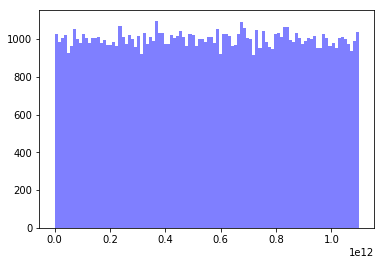

In [9]:
num_bins = 100
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.show()

In [66]:
import requests

In [110]:
r = requests.post('http://localhost:5000/insert_elements/', json= {'macs':['adfasdfasf','asdasfda']})
r.json()

{'macs_existentes_filtro': 0, 'nuevas_macs_filtro': 2}

63260